# Data distribution IID and non-IID

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline

In [2]:
import numpy
import struct

def read_mnist_data(fname_lbl, fname_img):
    '''
    Read MNIST data from a byte file.

    Return: tuple of inputs and labels (numpy)
    '''
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = numpy.fromfile(flbl, dtype=numpy.int8)
        if len(lbl) != num:
            print('Header mismatch. #labels != header number ({}!= {})'.format(len(lbl), num))

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        print()
        img = numpy.fromfile(fimg, dtype=numpy.uint8).reshape(num, rows, cols)

    return (lbl, img)

In [3]:
from itertools import groupby

def count_numbers(lbls):
    groups = groupby(numpy.sort(lbls))
    keys = [(key, len(list(data))) for (key, data) in groups]
    iid_x, iid_y = zip(*keys)
    return list(iid_x), list(iid_y)

In [4]:
width = 1.0-0.08

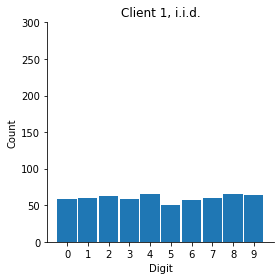

In [7]:
from pathlib import Path

DATA_DIR = Path('../src/data')
MNIST_DIR = DATA_DIR / 'mnist'

_, iid_ax = plt.subplots(1, figsize=(4,4))

iid_labels, _ = read_mnist_data(MNIST_DIR / 'car1-labels.byte', MNIST_DIR / 'car1-images.byte')
iid_x, iid_y = count_numbers(iid_labels)

iid_ax.bar(iid_x, iid_y, width=width, align='center')
iid_ax.set_title('Client 1, i.i.d.')

iid_ax.set_ylim([0, 300])
iid_ax.set_ylabel('Count')
iid_ax.set_xlabel('Digit')
iid_ax.set_xticks(range(10))

# Hide the right and top spines
iid_ax.spines['right'].set_visible(False)
iid_ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
iid_ax.yaxis.set_ticks_position('left')
iid_ax.xaxis.set_ticks_position('bottom')

plt.tight_layout()
plt.savefig('car_iid.pdf')
plt.show()

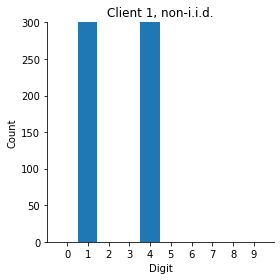

In [9]:
import numpy as np

MNIST_DIR = DATA_DIR / 'mnist-non-iid'

noniid_labels, _ = read_mnist_data(MNIST_DIR / 'car1-labels.byte', MNIST_DIR / 'car1-images.byte')
digits, nr_digits = count_numbers(noniid_labels)
noniid_y = np.zeros(10)
for i, nr in enumerate(nr_digits):
    noniid_y[digits[i]] = nr
noniid_x = list(range(10))

_, non_ax = plt.subplots(1, figsize=(4,4))

non_ax.bar(noniid_x, noniid_y, width=width, align='center')
non_ax.set_title('Client 1, non-i.i.d.')

non_ax.set_ylim([0, 300])
non_ax.set_ylabel('Count')
non_ax.set_xlabel('Digit')
non_ax.set_xticks(range(10))

# Hide the right and top spines
non_ax.spines['right'].set_visible(False)
non_ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
non_ax.yaxis.set_ticks_position('left')
non_ax.xaxis.set_ticks_position('bottom')

plt.tight_layout()
plt.savefig('car_non-iid.pdf')
plt.show()